In [1]:
#Importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math as math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [3]:
#Importer les jeux de données
df1 = pd.read_csv("all1.xlsx_Sheet1.csv")
df2 = pd.read_csv("all18.xlsx_Sheet1.csv")
df2.head()

,numéro de site,Altitude (m),longitude,latitude,années,mois,Température moyenne (℃),Température maximale moyenne (℃),Température minimale moyenne (℃)
0,89828099999,3250,"123,3666666","-75,1166666",1991,1,"-29,35","-24,04","-36,26"
1,89828099999,3250,"123,3666666","-75,1166666",1991,2,"-36,94","-30,27","-44,17"
2,89828099999,3250,"123,3666666","-75,1166666",1991,3,"-50,67","-44,67","-55,84"
3,89828099999,3250,"123,3666666","-75,1166666",1991,4,"-55,71",-52,"-59,18"
4,89828099999,3250,"123,3666666","-75,1166666",1991,5,"-67,32","-64,7","-69,42"


In [4]:
#Supression des valeurs manquantes, remplacer les virgules pas des points et transformer tous les résultats en float
df2["Température moyenne (℃)"] = df2["Température moyenne (℃)"].dropna()
df2["Température moyenne (℃)"] = df2["Température moyenne (℃)"].str.replace(",",".")
df2["Température moyenne (℃)"] = df2["Température moyenne (℃)"].astype("float")
df2["Température maximale moyenne (℃)"] = df2["Température maximale moyenne (℃)"].dropna()
df2["Température maximale moyenne (℃)"] = df2["Température maximale moyenne (℃)"].str.replace(",",".")
df2["Température maximale moyenne (℃)"] = df2["Température maximale moyenne (℃)"].astype("float")
df2["Température minimale moyenne (℃)"] = df2["Température minimale moyenne (℃)"].dropna()
df2["Température minimale moyenne (℃)"] = df2["Température minimale moyenne (℃)"].str.replace(",",".")
df2["Température minimale moyenne (℃)"] = df2["Température minimale moyenne (℃)"].astype("float")
df2 = df2[df2["Température maximale moyenne (℃)"].notna()]
df2 = df2[df2["Température minimale moyenne (℃)"].notna()]
df2 = df2[df2["Température moyenne (℃)"].notna()]
df2

,numéro de site,Altitude (m),longitude,latitude,années,mois,Température moyenne (℃),Température maximale moyenne (℃),Température minimale moyenne (℃)
0,89828099999,3250,"123,3666666","-75,1166666",1991,1,-29.35,-24.04,-36.26
1,89828099999,3250,"123,3666666","-75,1166666",1991,2,-36.94,-30.27,-44.17
2,89828099999,3250,"123,3666666","-75,1166666",1991,3,-50.67,-44.67,-55.84
3,89828099999,3250,"123,3666666","-75,1166666",1991,4,-55.71,-52.00,-59.18
4,89828099999,3250,"123,3666666","-75,1166666",1991,5,-67.32,-64.70,-69.42
...,...,...,...,...,...,...,...,...,...
365,89828099999,3250,"123,367","-75,117",2021,6,-61.79,-57.07,-66.01
366,89828099999,3250,"123,367","-75,117",2021,7,-60.68,-54.93,-65.81
367,89828099999,3250,"123,367","-75,117",2021,8,-54.64,-48.78,-59.65
368,89828099999,3250,"123,367","-75,117",2021,9,-59.43,-51.82,-65.29


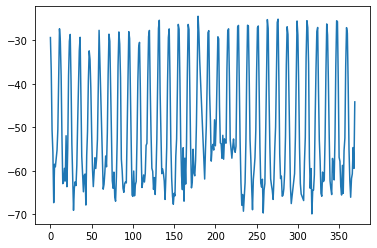

In [5]:
#Création d'un graphique sur le dossier all18
x = np.array(df2.index)
y = np.array(df2["Température moyenne (℃)"])
plt.plot(x, y)

plt.show() 

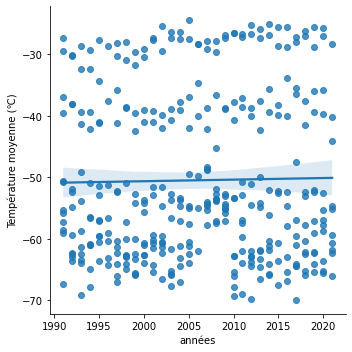

In [6]:
#Visualiser années et temp. moyenne
sns.lmplot(x="années", y="Température moyenne (℃)", data=df2)

In [7]:
#Petite vérification avant de débuter la régression
df2.iloc[:,6].head()

0   -29.35
1   -36.94
2   -50.67
3   -55.71
4   -67.32
Name: Température moyenne (℃), dtype: float64

In [8]:
#Début de la regression linéaire sur all18(df2)
df2.describe()

,numéro de site,Altitude (m),années,mois,Température moyenne (℃),Température maximale moyenne (℃),Température minimale moyenne (℃)
count,3.560000e+02,356.0,356.000000,356.000000,356.000000,356.000000,356.000000
mean,8.982810e+10,3250.0,2005.896067,6.533708,-50.456882,-44.738848,-55.916742
std,0.000000e+00,0.0,8.954211,3.475709,13.303699,14.217607,11.994952
min,8.982810e+10,3250.0,1991.000000,1.000000,-69.900000,-66.260000,-76.890000
25%,8.982810e+10,3250.0,1998.000000,3.750000,-61.850000,-57.085000,-65.740000
50%,8.982810e+10,3250.0,2006.000000,7.000000,-54.420000,-48.580000,-59.600000
75%,8.982810e+10,3250.0,2013.250000,10.000000,-38.985000,-31.652500,-46.742500
max,8.982810e+10,3250.0,2021.000000,12.000000,-24.450000,-17.860000,-30.090000


In [9]:
#Vérification et voir la forme du jeu de donnée
print(df2.shape)
print(df2.describe(include="all"))

(356, 9)
        numéro de site  Altitude (m)    longitude     latitude       années  \
count     3.560000e+02         356.0          356          356   356.000000   
unique             NaN           NaN            2            2          NaN   
top                NaN           NaN  123,3666666  -75,1166666          NaN   
freq               NaN           NaN          346          346          NaN   
mean      8.982810e+10        3250.0          NaN          NaN  2005.896067   
std       0.000000e+00           0.0          NaN          NaN     8.954211   
min       8.982810e+10        3250.0          NaN          NaN  1991.000000   
25%       8.982810e+10        3250.0          NaN          NaN  1998.000000   
50%       8.982810e+10        3250.0          NaN          NaN  2006.000000   
75%       8.982810e+10        3250.0          NaN          NaN  2013.250000   
max       8.982810e+10        3250.0          NaN          NaN  2021.000000   

              mois  Température moyenne (℃

In [10]:
#Vérifier qu'il ne reste aucune valeur manquante
df2.isnull().any()

numéro de site                      False
Altitude (m)                        False
longitude                           False
latitude                            False
années                              False
mois                                False
Température moyenne (℃)             False
Température maximale moyenne (℃)    False
Température minimale moyenne (℃)    False
dtype: bool

In [11]:
#Cible distincte et variable de fonctionnalité
print("Separating target variable from features...")

features_list = ["années", "mois", "Température maximale moyenne (℃)", "Température minimale moyenne (℃)"]

X = df2.loc[:,features_list]  
y = df2.loc[:,"Température moyenne (℃)"] 

print("...Done.")
print()

Separating target variable from features...
...Done.



In [12]:
#Diviser les données en ensemble d'entraînement et de test
print("Splitting dataset into train set and test set...")
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    ) 

print("...Done.")    

Splitting dataset into train set and test set...
...Done.


In [13]:
#Standardiser nos données
print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
numeric_features = [0, 1, 2, 3] 
numeric_transformer = StandardScaler()

feature_encoder = ColumnTransformer(
    transformers=[ 
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,0:5]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

#### X_train BEFORE preprocessing ####
     années  mois  Température maximale moyenne (℃)  \
256    2012     5                            -59.49   
324    2018     1                            -20.97   
351    2020     4                            -52.76   
146    2003     3                            -47.41   
21     1992    10                            -45.76   

     Température minimale moyenne (℃)  
256                            -67.64  
324                            -33.67  
351                            -62.16  
146                            -58.44  
21                             -63.19  

Encoding categorical features and standardizing numerical features...
...Done.
#### X_train AFTER preprocessing ####
[[ 0.63063147 -0.42788451 -1.04390676 -0.9777402 ]
 [ 1.28787675 -1.57972528  1.68694344  1.88580825]
 [ 1.50695851 -0.7158447  -0.56678781 -0.51579597]
 [-0.35523645 -1.00380489 -0.18750306 -0.20221339]
 [-1.56018612  1.01191645 -0.07052739 -0.60262126]]



In [14]:
#Construire notre modèle
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("...Done.")

Train model...
...Done.


In [15]:
#Tester notre modèle et voir les prédictions
print("Final accuracy score on Test set: ",regressor.score(X_test, y_test))

print("Predictions on training set...")
y_train_pred = regressor.predict(X_train)
print("...Done.")
print(y_train_pred[:5])
print()

Final accuracy score on Test set:  -2140.0000709110695
Predictions on training set...
...Done.
[-63.92031848 -26.95428853 -57.69668599 -53.16444277 -54.89526382]



c:\Python39\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [16]:
#Pareil pour l'ensemble des données et comparer les performances
print("--- Testing pipeline ---")

print("Standardizing numerical features...")
print(X_test)
print()

X_test = feature_encoder.transform(X_test)

print("...Done.")
print(X_test[:5])
print()

print("Predictions on test set...")
y_test_pred = regressor.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()

--- Testing pipeline ---
Standardizing numerical features...
     années  mois  Température maximale moyenne (℃)  \
6      1991     7                            -56.17   
144    2003     1                            -21.36   
316    2017     5                            -54.29   
229    2010     2                            -32.59   
94     1998    11                            -31.68   
..      ...   ...                               ...   
168    2005     1                            -21.34   
160    2004     5                            -60.65   
205    2008     2                            -37.75   
67     1996     8                            -52.22   
313    2017     2                            -27.50   

     Température minimale moyenne (℃)  
6                              -61.92  
144                            -34.28  
316                            -64.18  
229                            -49.17  
94                             -45.26  
..                                ... 

In [17]:
#Voir les scores de notre modèle sur le train et l'ensemble de test avec la méthode R2 grâce à sklearn
print("--- Assessing the performances of the model ---")

print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

--- Assessing the performances of the model ---
R2 score on training set :  0.9992418362612934
R2 score on test set :  0.9992756989952031


### On peut voir que le résultat sur le test set est très proche de 1, ce qui veut dire que notre modèle est performant.